## Classification Project for Social Network Ads Using Random Forest Algorithm

## 

### Import Packages 

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

### Load & Inspect Data

In [73]:
df = pd.read_csv('Social_Network_Ads.csv')

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
df.shape

(400, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
df.duplicated().sum()

0

In [74]:
df.drop('User ID',inplace=True,axis=1)

## EDA

In [17]:
df.drop('Purchased',axis=1).describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.66,10.48,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.50,34096.96,15000.0,43000.00,70000.0,88000.0,150000.0


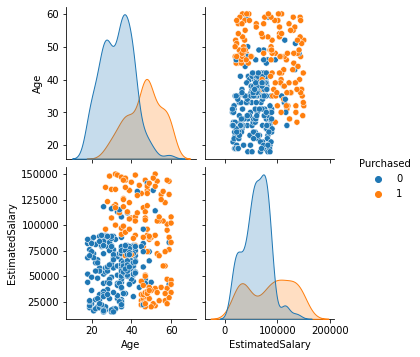

In [18]:
sns.pairplot(df,hue='Purchased')

In [42]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [44]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

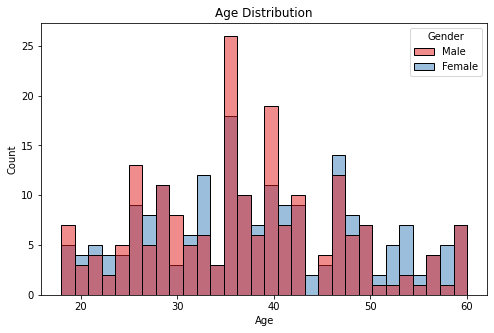

In [40]:
plt.figure(figsize=(8,5))
plt.title('Age Distribution')
sns.histplot(data=df,x='Age',hue='Gender',palette='Set1',bins=30)
plt.show()

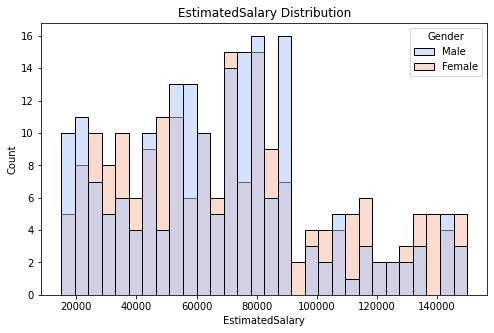

In [41]:
plt.figure(figsize=(8,5))
plt.title('EstimatedSalary Distribution')
sns.histplot(data=df,x='EstimatedSalary',hue='Gender',palette='coolwarm',bins=30)
plt.show()

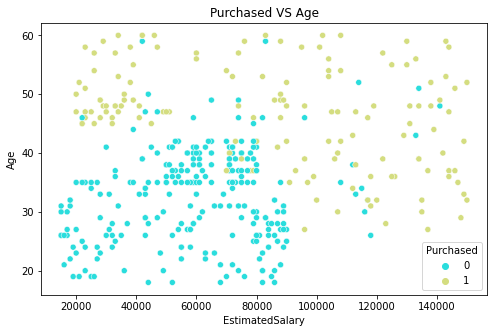

In [45]:
plt.figure(figsize=(8,5))
plt.title('Purchased VS Age')
sns.scatterplot(data=df,x='EstimatedSalary',y='Age',hue='Purchased',palette='rainbow')
plt.show()

In [51]:
df.groupby('Purchased')['Age','EstimatedSalary'].mean().round(2).T

Purchased,0,1
Age,32.79,46.39
EstimatedSalary,60544.75,86272.73


In [55]:
corr = df.drop('Purchased',axis=1).corr().round(3)
corr

,Age,EstimatedSalary
Age,1.000,0.155
EstimatedSalary,0.155,1.000


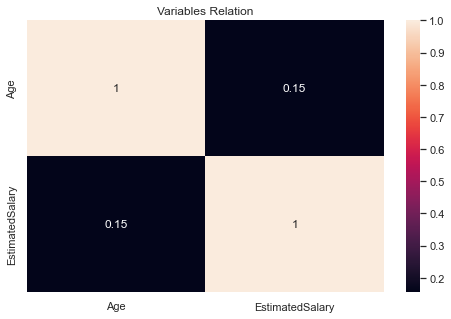

In [57]:
plt.figure(figsize=(8,5))
plt.title('Variables Relation')
sns.heatmap(corr,annot=True)
plt.show()

### Data Preprocessing

In [75]:
df_gender = pd.get_dummies(df['Gender'],drop_first=True)

In [76]:
df = pd.concat([df_gender,df],axis=1)

In [78]:
df.drop('Gender',axis=1,inplace=True)

In [80]:
df.head(3)

,Male,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0


### Model Building & Training

In [81]:
X = df.drop('Purchased',axis=1)
y = df['Purchased']

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [87]:
model = RandomForestClassifier()

In [88]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
pred = model.predict(X_test)

### Model Evaluation 

In [90]:
model.score(X_test, y_test)

0.9090909090909091

In [93]:
print(classification_report(y_test,pred))
print('----------------------------------------------------')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        80
           1       0.87      0.90      0.89        52

    accuracy                           0.91       132
   macro avg       0.90      0.91      0.91       132
weighted avg       0.91      0.91      0.91       132

----------------------------------------------------
[[73  7]
 [ 5 47]]


## 